# 初识PyTorch

### 梯度下降法动手实现多元线性回归

In [ ]:
# Feature数据
X = [[10,3],[20,3],[25,3],[28,2.5],[30,2],[35,2.5],[40,2.5]]
y = [60,85,100,120,140,145,163]  # 标签数据
# 初始化参数
w = [0.0,0.0,0.0]    # w0,w1,w2
lr = 0.001           # 学习率
iteration = 2000000  # 迭代次数
# 梯度下降
for it in range(iteration):
    # 计算预测值（逐样本）【前向传播】
    y_pred = []
    for i in range(len(X)):
        y_pred.append(w[0] + w[1]*X[i][0] + w[2]*X[i][1])
    # 计算损失函数（均方误差MSE）
    loss = 0.0
    for i in range(len(y)):
        loss += (y[i] - y_pred[i])**2
    loss /= len(y)
    # 手动计算梯度【反向传播】
    dw0 = dw1 = dw2 = 0.0
    for i in range(len(y)):
        dw0 += -2*(y[i]-y_pred[i])
        dw1 += -2*(y[i]-y_pred[i])*X[i][0]
        dw2 += -2*(y[i]-y_pred[i])*X[i][1]
    dw0 /= len(y)
    dw1 /= len(y)
    dw2 /= len(y)
    # 更新参数
    w[0] -= lr*dw0
    w[1] -= lr*dw1
    w[2] -= lr*dw2
    # 每5000次迭代输出一次损失函数
    if it % 5000 == 0:
        print(f"Iteration {it}: Loss = {loss}")
# 输出最终参数
print(f"Final parameters: w0 = {w[0]}, w1 = {w[1]}, w2 = {w[2]}")

Iteration 0: Loss = 14631.285714285714
Iteration 5000: Loss = 54.61083833560779
Iteration 10000: Loss = 49.343214206473796
Iteration 15000: Loss = 44.647615872447524
Iteration 20000: Loss = 40.46192547875196
Iteration 25000: Loss = 36.73077071942799
Iteration 30000: Loss = 33.404792319545855
Iteration 35000: Loss = 30.439991063623914
Iteration 40000: Loss = 27.7971457320286
Iteration 45000: Loss = 25.4412942452602
Iteration 50000: Loss = 23.341271152210684
Iteration 55000: Loss = 21.469295343841374
Iteration 60000: Loss = 19.80060253816774
Iteration 65000: Loss = 18.31311767471115
Iteration 70000: Loss = 16.987162884536332
Iteration 75000: Loss = 15.80519717262881
Iteration 80000: Loss = 14.751584368876536
Iteration 85000: Loss = 13.81238627789335
Iteration 90000: Loss = 12.975178291273503
Iteration 95000: Loss = 12.228885023017044
Iteration 100000: Loss = 11.563633793757345
Iteration 105000: Loss = 10.970624025539278
Iteration 110000: Loss = 10.44201081937723
Iteration 115000: Loss = 

In [2]:
import torch
print(torch.__version__)

2.5.1


## Tensor
- PyTorch把对数据的存储和操作都封装在Tensor里
- GPU计算加速
- 自动求导

### Tensor是多维数组：
- 标量（0维）：单个数，比如 torch.tensor(3.14)
- 向量（1维）：一列数，比如 torch.tensor([1,2,3])
- 矩阵（2维）：行列数据，比如 torch.tensor([[1,2],[3,4]])
- 高维张量（3维及以上）：高维数据，比如torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]])

In [2]:
"""创建一个Tensor"""
import torch
import numpy as np
# 1D Tensor
t1 = torch.tensor([1,2,3])
print(t1)
# 2D Tensor
t2 = torch.tensor([[1,2,3],[4,5,6]])
print(t2)
# 3D Tensor
t3 = torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]])
print(t3)
print(t3.shape)  # 查看形状       torch.Size([2, 2, 2])
print(t3.dtype)  # 查看数据类型   torch.int64
print(t3.device) # 查看存储设备   cpu

# 从NumPy数组创建Tensor
arr = np.array([[1,2,3],[4,5,6]])
t_np = torch.tensor(arr)
print(t_np)



tensor([1, 2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
torch.Size([2, 2, 2])
torch.int64
cpu
tensor([[1, 2, 3],
        [4, 5, 6]])


PyTorch里的数据类型主要为：

1. 整数型 torch.uint8、torch.int32、torch.int64。其中torch.int64为默认的整数类型。

2. 浮点型 torch.float16、torch.bfloat16、 torch.float32、torch.float64，其中torch.- float32为默认的浮点数据类型。

3. 布尔型 torch.bool

torch.float32为全精度，其他为半精度，一般情况下模型训练在全精度下进行。

混合精度训练（全精度+半精度），可以加速训练，节省显存。

In [3]:
#自己指定数据类型
t_float = torch.tensor([1,2,3], dtype=torch.float32)
print(t_float)  # tensor([1., 2., 3.])

#布尔型torch.bool
#Bool类型在PyTorch里可以进行高效的索引操作
x = torch.tensor([1,2,3,4,5])
mask = x > 2  # 生成布尔掩码
print(mask)  # tensor([False, False,  True,  True,  True])
print(x[mask])  # 使用布尔掩码进行索引：tensor([3, 4, 5])
x[mask] = 0
print(x)  # tensor([1, 2, 0, 0, 0])

tensor([1., 2., 3.])
tensor([False, False,  True,  True,  True])
tensor([3, 4, 5])
tensor([1, 2, 0, 0, 0])


In [ ]:
# 创建tensor指定设备（默认在CPU/内存上）
#创建GPU/显存上的Tensor
t_gpu = torch.tensor([1,2,3],device = "cuda")
print(t_gpu.device)   # cuda:0

cuda:0


d:\Software\Anaconda\envs\ml_full\lib\site-packages\torch\cuda\__init__.py:235: UserWarning: 
NVIDIA GeForce RTX 5060 Laptop GPU with CUDA capability sm_120 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_50 sm_60 sm_61 sm_70 sm_75 sm_80 sm_86 sm_90.
If you want to use the NVIDIA GeForce RTX 5060 Laptop GPU GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(


In [ ]:
#指定值或随机值填充tensor、指定tensor形状
shape = (2,3) #设定张量的形状，即Tensor的维度
rand_tensor = torch.rand(shape) #创建元素值在[0,1)之间均匀分布的tensor
print(f"rand_tensor:{rand_tensor}")
randn_tensor = torch.randn(shape) #创建一个元素值服从标准正态分布的tensor（均值0，标准差1）
print(f"randn_tensor:{randn_tensor}")
ones_tensor = torch.ones(shape) #创建一个所有元素值都为1的tensor
print(f"ones_tensor:{ones_tensor}")
zeros_tensor = torch.zeros(shape) #创建一个所有元素值都为0的tensor
print(f"zeros_tensor:{zeros_tensor}")

#torch.full(size,value) 全value张量
twos_tensor = torch.full(shape,2) #创建一个所有元素值都为2的tensor
print(f"twos_tensor:{twos_tensor}")
eye_tensor = torch.eye(3) #创建一个3x3的单位矩阵
print(f"eye_tensor:{eye_tensor}")

rand_tensor:tensor([[0.9195, 0.8634, 0.2596],
        [0.8207, 0.0605, 0.3544]])
randn_tensor:tensor([[ 1.0194, -1.0777,  1.4600],
        [-0.0186,  0.2078,  1.8254]])
ones_tensor:tensor([[1., 1., 1.],
        [1., 1., 1.]])
zeros_tensor:tensor([[0., 0., 0.],
        [0., 0., 0.]])
twos_tensor:tensor([[2, 2, 2],
        [2, 2, 2]])
eye_tensor:tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


### Tensor的属性
__torch.randn(size, *, dtype=None, device=None, requires_grad=False)__

1. tensor形状（shape/size）

2. tensor内元素类型（dtype:默认torch.float32）

3. tensor的设备（device:CPU/GPU）

4. 计算梯度（requires_grad:是否需要计算梯度，用于深度学习）

In [6]:
tensor = torch.rand(3,4)
print(f"Shape of tensor:{tensor.shape}") # tensor形状
print(f"Datatype of tensor:{tensor.dtype}") # tensor内元素类型
print(f"Device tensor is stored on:{tensor.device}") #tensor的设备

Shape of tensor:torch.Size([3, 4])
Datatype of tensor:torch.float32
Device tensor is stored on:cpu


### Tensor的操作
1. 形状变换 
- x = x.reshape()   按元素顺序重新组织维度
- x = x.permute()   改变元素顺序，交换tensor的维度（对于二维矩阵就是行列互换，转置）

__在PyTorch里，张量的维度（dimension/axis）是用0，1，2...表示（从0开始！！！）__

__第0个维度是行，第1个维度是列__

2. 数字运算

3. 统计函数

4. 索引、切片

5. 广播机制

#### 1、形状变换

In [ ]:

x = torch.randn(4,4) 
x_reshape = x.reshape(16)   #展平为1维向量
x_permute = x.permute(1,0)  #交换第0维和第1维，转置
print(x)
print(x_reshape)
print(x_permute)

# 对于二维tensor,可用torch.t()转置
x_t = torch.t(x)

# 扩展tensor的维度，可使用torch.unsqueeze()
x = torch.tensor([1,2,3,4])
# 扩展第0维
x_0 = x.unsqueeze(0) 
print(x_0.shape,x_0)    # torch.Size([1, 4]) tensor([[1, 2, 3, 4]])
#扩展第1维
x_1 = x.unsqueeze(1)
print(x_1.shape,x_1)    # torch.Size([4, 1]) tensor([[1],[2],[3],[4]])

# 缩减tensor的维度，可使用torch.squeeze()
# 指定需要缩减的维度索引
# 若不指定，则会把所有大小为1的维度都去掉
x = torch.ones((1,1,3)) # 3维tensor
y = x.squeeze(dim = 0) #缩减第0维
print(y.shape)  # torch.Size([1, 3])
z = x.squeeze()    #缩减所有为1的维度
print(z.shape)  # torch.Size([3]) 
 

tensor([[-1.9341,  0.4838, -0.2445, -1.1633],
        [-0.9069,  1.6950, -0.4087, -0.6391],
        [-0.9152,  1.0841, -0.1041,  0.6078],
        [ 0.2125,  0.0835, -1.6805, -0.4007]])
tensor([-1.9341,  0.4838, -0.2445, -1.1633, -0.9069,  1.6950, -0.4087, -0.6391,
        -0.9152,  1.0841, -0.1041,  0.6078,  0.2125,  0.0835, -1.6805, -0.4007])
tensor([[-1.9341, -0.9069, -0.9152,  0.2125],
        [ 0.4838,  1.6950,  1.0841,  0.0835],
        [-0.2445, -0.4087, -0.1041, -1.6805],
        [-1.1633, -0.6391,  0.6078, -0.4007]])
torch.Size([1, 4]) tensor([[1, 2, 3, 4]])
torch.Size([4, 1]) tensor([[1],
        [2],
        [3],
        [4]])
torch.Size([1, 3])
torch.Size([3])


#### 2、数学运算

In [ ]:

a = torch.ones((2,3))
b = torch.ones((2,3))
#逐元素运算（维度不变）
print(a + b) # 加法
print(a - b) # 减法
print(a * b) # 乘法
print(a / b) # 除法
#矩阵乘法（改变维度）
print(a @ b.T)  #b.T是b的转置

#### 3、统计函数

In [ ]:

x = torch.tensor([[1,3],[1,3],[1,3]])
# 计算均值：整数tensor不能直接计算均值，需要先转换为浮点型
x = x.float()
mean_x = x.mean() # 求整个矩阵的均值 
x_sum = x.sum()   # 求和
x_std = x.std()   # 求标准差
x_var = x.var()   # 求方差
x_max = x.max()   # 求最大值
x_min = x.min()   # 求最小值

# 求均值是把指定维度消掉，其他维度保留!!!!!
x1_mean = x.mean(dim=0) # 消掉第0维，按列求均值
x2_mean = x.mean(dim=1) # 消掉第1维，按行求均值

# 统计后保持原来维度不变，不消灭统计的维度
# 指定参数 keepdim=True
x1_mean_keepdim = x.mean(dim=0,keepdim=True) # 保持第0维

#### 4、索引与切片

计数与C语言风格类似，从0开始计数，左闭右开

In [ ]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x[0,0])  # 访问第1行第1列元素，返回tensor(1)       
print(x[1])    # 访问第2行所有元素，返回一个1维tensor
print(x[:,1])  # 访问第2列所有元素，返回一个1维tensor
print(x[0:2,1:3]) # 访问第1-2行，第2-3列元素，返回一个2维tensor

tensor(1)
tensor([4, 5, 6])
tensor([2, 5, 8])
tensor([[2, 3],
        [5, 6]])


#### 5、广播机制

原则上来说，tensor的所有的逐元素运算都要求两个tensor的形状必须完全一致。

但在实际中，假如我们有一个tensor：t1。t1的shape为（3，2）。我们想给t1的每个元素都加上1。

此时我们不必构造一个shape为（3,2），元素全为1的tensor再进行相加。

我们可以直接写 t1 +1，PyTorch内部会虚拟扩展出一个形状为（3,2）的tensor，再和t1相加。

这种机制，就是广播机制。

__PyTorch 在进行广播计算时，并不会真的复制数据，而是通过调整张量的索引方式（Strided Memory Access）来实现逐元素计算。__


In [28]:
t1 = torch.randn((3,2))
print(t1)
print(t1+1)

tensor([[ 0.3812, -1.1607],
        [ 0.3348,  1.7176],
        [-0.4116, -0.4875]])
tensor([[ 1.3812, -0.1607],
        [ 1.3348,  2.7176],
        [ 0.5884,  0.5125]])


In [ ]:
t1 = torch.ones((3,2))
print(t1)
t2 = torch.ones(2)
print(t2)
print(t1 + t2)  # 广播机制

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([1.])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


广播机制的一般原则：

1. __维度对齐__ ：如果两个tensor的维度数不同，则在较小维度的tensor的形状前面补1，直到两个tensor的维度数相同。

2. __扩展维度__ ：在 **维度值为1** 的维度上，通过虚拟复制，让两个tensor的维度值相等。

如果两个tensor在某个维度上的长度不匹配，且两个tensor在该维度上的长度都不为1，则报错。

3. __进行按位计算__ 

### 利用GPU加速计算 —— 大幅度加速

默认创建的tensor都是在CPU/内存上。让tensor转移到GPU/显存上：

1. 创建时，设定tensor的设备为“cuda”

2. 将cpu上的tensor通过to("cuda")方法转移到GPU上

检查你的环境里是否有可用的英伟达GPU: **torch.cuda.is_available()** 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

A@B 是 torch.matmul(A,B) 的简写,可处理高维度的tensor(批量矩阵乘法)

torch.mm(A,B) 只能用于二维矩阵

### Tensor在不同设备上的计算原则
模型和张量需要显式移动到目标设备上（如 GPU）；

所有参与同一计算的张量必须位于相同设备，计算结果也会保留在该设备上。

## 计算图与自动求梯度

梯度计算：

1. 分析自变量x和因变量y的关系

2. 形成**计算图**

3. 根据链式法则和求导公式计算偏导数，得到梯度



![alt text](image.png)

### PyTorch自动求梯度


In [ ]:
import torch
x = torch.tensor(1.0,requires_grad=True) # 注意要写1.0，梯度计算必须是浮点数
y = torch.tensor(1.0,requires_grad=True)
v = 3*x+4*y
u = torch.square(v)  # v**2,逐元素平方
z = torch.log(u)

z.backward()  # 反向传播（backpropagation)，计算梯度
print(x.grad)  # dz/dx
print(y.grad)  # dz/dy

tensor(0.8571)
tensor(1.1429)


#### 为什么需要反向传播计算梯度？
深度学习有：输入、模型参数、输出、损失函数

训练目标是通过不断更新参数，让loss最小

---> 更新参数（eg:SGD算法）让loss最小，需要知道loss对每个参数的导数

反向传播就是：从损失函数往回走，利用链式法则自动计算每个参数的梯度，更新模型参数

#### SGD算法（随机梯度下降，Stochastic Gradient Descent）
y = wx + b   (w:weight 权重    b:bias 偏差)

参数更新过程：θ被梯度往下推向最小值点



## 用PyTorch实现线性回归

targets的真实计算规则是: 
$$
y = 1.1x_1 + 2.2x_2 + 3.3x_3 + 4.4 + noise
$$


In [ ]:
"""生成训练数据"""
import torch
# 确保cuda可用
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu") # 如果没有GPU，改成"cpu"
# 生成训练数据
inputs = torch.rand(100,3) #随机生成shape为（100，3）的tensor，元素值在[0,1)均匀分布
weights = torch.tensor([[1.1],[2.2],[3.3]]) #预设的权重
bias = torch.tensor(4.4)      #预设的偏置
targets = inputs @ weights + bias + 0.1*torch.randn(100,1)  #x @ w + b + 噪声，增加噪声误差，模拟真实情况
"""随机生成100条数据,每条数据3个feature,生成最终targets作为label值"""

"""用随机值初始化线性回归模型的参数"""
# 初始化参数时直接放在CUDA上，启用梯度计算
w = torch.rand((3,1), requires_grad=True, device=device) #权重
b = torch.rand((1,), requires_grad=True, device=device)    #偏置

"""训练线性回归模型"""
# 将数据移至相同设备
inputs = inputs.to(device)
targets = targets.to(device)

"""
参数(Parameter)：模型内部通过训练学到的数值。
超参数(Hyperparameter):在训练前就人为设定的数值：

常见的超参数有：
学习率 (learning rate)：梯度下降时每一步更新参数的大小。
批大小 (batch size)：每次训练用多少样本。
迭代次数/轮数 (epochs)：整个训练集被训练多少遍。
隐藏层大小 (hidden units)：神经网络里每一层的神经元数。
正则化系数 (L2, dropout 比例等)：防止过拟合的强度。
这些值一旦设置好，训练过程中不会自动改变（除非你写代码动态调整）。
"""
# 设置超参数
epoch = 100000 # 迭代次数
lr = 0.005    # 学习率

for i in range(epoch):
    outputs = inputs @ w + b  # 前向传播，计算预测值
    loss = torch.mean(torch.square(outputs - targets)) # 计算均方误差MSE损失函数
    print("loss:",loss.item())  # .item()把只含一个数的张量，转换成普通的Python数字标量
    
    loss.backward()  # 反向传播，计算梯度，存储到 w.grad, b.grad
    
    """w.grad 获取loss对w的梯度, b.grad获取loss对b的梯度"""
    with torch.no_grad():  # 下面的计算不需要用梯度，关闭节省内存
        w -= lr * w.grad  # 更新权重
        b -= lr * b.grad  # 更新偏置
        
    # 清零梯度，避免梯度值一直累积
    w.grad.zero_()
    b.grad.zero_()
        
print("训练后的权重w:", w)
print("训练后的偏置b:", b)

loss: 41.5095329284668
loss: 40.10163116455078
loss: 38.7415657043457
loss: 37.427711486816406
loss: 36.15849685668945
loss: 34.93240737915039
loss: 33.74797058105469
loss: 32.60377883911133
loss: 31.498464584350586
loss: 30.43069839477539
loss: 29.399215698242188
loss: 28.40277671813965
loss: 27.440187454223633
loss: 26.51030731201172
loss: 25.612018585205078
loss: 24.744247436523438
loss: 23.905967712402344
loss: 23.09615707397461
loss: 22.313865661621094
loss: 21.558149337768555
loss: 20.828109741210938
loss: 20.12287139892578
loss: 19.44159507751465
loss: 18.783458709716797
loss: 18.147687911987305
loss: 17.53351402282715
loss: 16.940204620361328
loss: 16.367053985595703
loss: 15.813372611999512
loss: 15.278499603271484
loss: 14.761798858642578
loss: 14.262651443481445
loss: 13.780461311340332
loss: 13.314652442932129
loss: 12.864666938781738
loss: 12.42996597290039
loss: 12.010034561157227
loss: 11.604366302490234
loss: 11.212481498718262
loss: 10.833906173706055
loss: 10.46819305

**形状和维度的关系**

(1,) → 一维向量（只有 1 个元素）

(2,) → 一维向量（有 2 个元素，例如 [a, b]）

(1,2) → 二维矩阵，1 行 2 列

(2,3) → 二维矩阵，2 行 3 列

(2,3,4) → 三维张量（可以想象成 2 个 3×4 的矩阵叠在一起）



In [6]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))


PyTorch version: 2.5.1+cu121
CUDA version: 12.1
CUDA available: True
GPU name: NVIDIA GeForce RTX 5060 Laptop GPU


## 利用TensorBoard对线性回归模型训练过程绘制loss曲线
SummaryWriter类，用来把训练过程中的数据（比如损失、准确率、模型图、图像、直方图等）写入日志文件，通过Tensor Board可视化。

重新训练模型，指定的记录位置处会产生文件

在Anaconda Prompt里，激活环境，运行：

tensorboard --logdir="D:/PDXAC/code/deep_learning/runs/"

In [4]:
import torch
# 导入SummaryWriter类
from torch.utils.tensorboard import SummaryWriter

# 确保CUDA可用
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")  # 如果没有GPU，改成"cpu"

# 生成数据
inputs = torch.rand(100,3) # 100条数据，每条3个feature
weights = torch.tensor([[1.1],[2.2],[3.3]]) #预设的权重
bias = torch.tensor(4.4)      #预设的偏置
targets = inputs @ weights + bias +0.1*torch.randn(100,1)  #x @ w + b + 噪声

# 创建一个SummaryWriter实例，通过log_dir设置记录文件的位置
writer = SummaryWriter(log_dir = "D:/PDXAC/code/deep_learning/runs/")

# 初始化参数时直接放在CUDA上，启用梯度计算
w = torch.rand((3,1), requires_grad=True, device=device) #权重
b = torch.rand((1,), requires_grad=True, device=device)    #偏置

# 将数据移至相同设备
inputs = inputs.to(device)
targets = targets.to(device)

# 设置超参数
epoch = 10000 # 迭代次数
lr = 0.003    # 学习率

for i in range(epoch):
    outputs = inputs @ w + b  # 前向传播，计算预测值
    loss = torch.mean(torch.square(outputs - targets)) # 计算均方误差MSE损失函数
    print("loss:",loss.item())  # .item()把只含一个数的张量，转换成普通的Python数字标量
    
    # 训练的每一步写入loss值，传入三个参数分别为：标签名，loss值，训练的步数
    writer.add_scalar("loss/train",loss.item(),i)
    loss.backward()  # 反向传播，计算梯度，存储到 w.grad, b.grad
    
    with torch.no_grad():  # 下面的计算不需要用梯度，关闭节省内存
        w -= lr * w.grad  # 更新权重
        b -= lr * b.grad  # 更新偏置
        
    # 清零梯度，避免梯度值一直累积
    w.grad.zero_()
    b.grad.zero_()
    
print("训练后的权重w:", w)
print("训练后的偏置b:", b)

loss: 46.21493148803711
loss: 45.20921325683594
loss: 44.225521087646484
loss: 43.26335525512695
loss: 42.3222541809082
loss: 41.40175247192383
loss: 40.501407623291016
loss: 39.62076187133789
loss: 38.759395599365234
loss: 37.91688919067383
loss: 37.09281921386719
loss: 36.28678894042969
loss: 35.4984016418457
loss: 34.72727584838867
loss: 33.973026275634766
loss: 33.235286712646484
loss: 32.513694763183594
loss: 31.80789566040039
loss: 31.1175479888916
loss: 30.442312240600586
loss: 29.781850814819336
loss: 29.135848999023438
loss: 28.503984451293945
loss: 27.88595199584961
loss: 27.281444549560547
loss: 26.690170288085938
loss: 26.111833572387695
loss: 25.546157836914062
loss: 24.99285888671875
loss: 24.451671600341797
loss: 23.922334671020508
loss: 23.404573440551758
loss: 22.898149490356445
loss: 22.40280532836914
loss: 21.91830062866211
loss: 21.44440460205078
loss: 20.980873107910156
loss: 20.527490615844727
loss: 20.084028244018555
loss: 19.650270462036133
loss: 19.226005554199

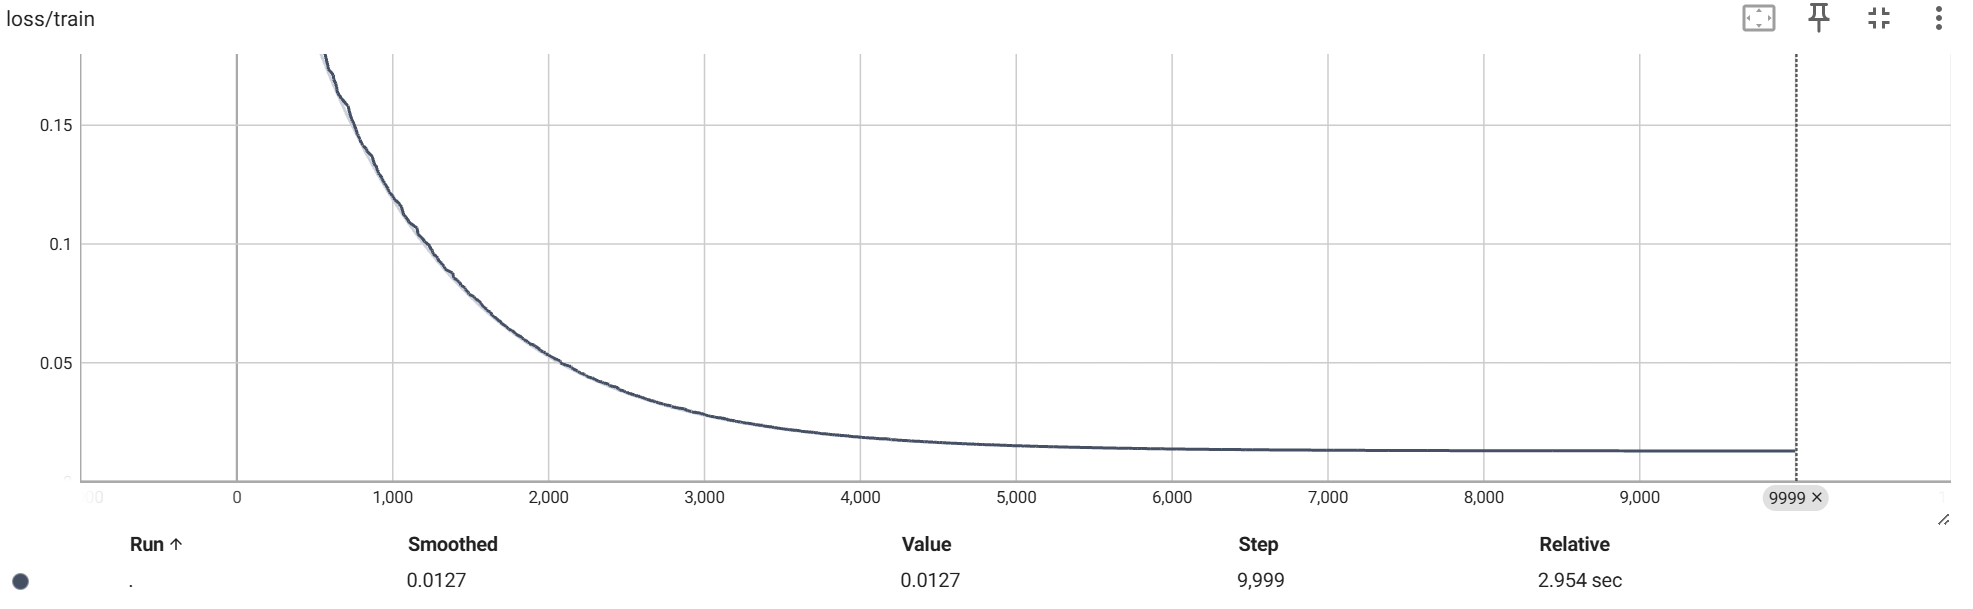

这是一个非常理想的loss曲线，前边一段训练过程loss快速下降，到后边loss逐渐变化很小，证明已经收敛。整个训练过程loss变化也很平稳，因为整个曲线很平滑。

根据loss曲线，可以判断在loss几乎不变，看起来是一条平行于x轴的直线时，我们认为模型收敛，梯度下降已经不能进一步减少损失了，此时可以终止训练，得到最优模型。

[CSV](../deep_learning/runs/csv.csv)  是TensorBoard事件日志（event）导出的CSV，记录写入的标量数据

Wall time 事件发生的真实时间

Step 训练的迭代次数

Value 事件对应的值(loss值)


## Normalization 归一化/标准化
数据集里的特征往往数值范围差别很大，直接用原始数据，特征值大的数会主导梯度更新，让模型训练不稳定。

Normalization 让不同特征处于相似的数值范围（比如 [0,1] 或均值为 0、方差为 1），避免训练过程不稳定，加快收敛，并提升模型效果。

避免输入过大——梯度爆炸（Loss下降速度非常快后反向放大至NaN）

避免输入过小——梯度消失（Loss几乎不下降）

### 对feature进行归一化（Min-Max Normalization）
如果我们让所有feature的取值范围相同，这样所有训练参数对loss函数的影响就相同了，计算得到的梯度都差不多，就可以用统一的学习率来进行调整了。 

对于bias而言，它的系数为1，相当于它的输入feature大小永远都是1。那么我们就把其他feature都调整到1左右。

最简单的做法，就是让输入feature都除以这个feature的最大值，这样所有feature的取值都是0到1之间

### 对feature进行标准化（（Standardization/Z-score）变成均值为0，标准差为1的分布）

对于归一化，对每个feature除以这个feature所有样本中绝对值最大的值，只有这一个值决定缩放大小。但这个值有可能是个异常值。

相比之下标准化处理会考虑所有样本的分布情况，避免缩放受异常值的影响，训练起来会更稳定。

In [ ]:
"测试是否能用GPU"
import torch
print(torch.__version__)
print(torch.cuda.is_available())
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))

2.8.0+cu128
True
NVIDIA GeForce RTX 5060 Laptop GPU


#### 预测时的归一化
有一点要特别注意，假如你在训练时对数据做了归一化，那么你一定要记录你做归一化时的参数。

在对数据进行预测时，首先需要先对feature用同样的参数进行归一化，然后再带入模型，得到预测值。

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inputs = torch.tensor([[2,1000],[3,2000],[2,500],[1,800],[4,3000]],dtype = torch.float, device = device)
labels = torch.tensor([[19],[31],[14],[15],[43]],dtype = torch.float, device = device)

# 计算特征的均值和标准差
mean = inputs.mean(dim=0)
std = inputs.std(dim=0)

# 标准化
inputs_norm =(inputs-mean)/std

w = torch.ones((2,1),requires_grad=True, device=device)
b = torch.ones((1,),requires_grad=True, device=device)

# 设置超参数
epoch = 1000 # 迭代次数
lr = 0.5    # 学习率

for i in range(epoch):
    outputs = inputs_norm @ w + b  # 前向传播，计算预测值
    loss = torch.mean(torch.square(outputs - labels)) # 计算均方误差MSE损失函数
    print("loss:",loss.item())  # .item()把只含一个数的张量，转换成普通的Python数字标量
    loss.backward()  # 反向传播，计算梯度，存储到 w.grad, b.grad
    print("w.grad:",w.grad.tolist())   
    """
    .tolist()是把任意形状的张量,转成Python列表
    .item()是把只含一个数的张量,转换成普通的Python数字标量
    """
    with torch.no_grad():
        w -= lr * w.grad  # 更新权重
        b -= lr * b.grad  # 更新偏置
        
    w.grad.zero_()
    b.grad.zero_()
    
"""预测新样本,这个预测结果就是模型对新输入new_input 的 pred 值预测"""
new_input = torch.tensor([[3,2500]],dtype = torch.float, device = device)
# 对新样本进行标准化
new_input_norm = (new_input - mean)/std
# 带入模型进行预测
pred = new_input_norm @ w + b
print("预测结果:",pred.item()) 

loss: 635.2097778320312
w.grad: [[-15.60400390625], [-16.726499557495117]]
loss: 25.922632217407227
w.grad: [[9.087748527526855], [8.043952941894531]]
loss: 8.4130220413208
w.grad: [[-4.0536723136901855], [-5.024291038513184]]
loss: 3.343095541000366
w.grad: [[2.8564584255218506], [1.9538871049880981]]
loss: 1.7868238687515259
w.grad: [[-0.8548362255096436], [-1.6941308975219727]]
loss: 1.2350934743881226
w.grad: [[1.0655667781829834], [0.2851123511791229]]
loss: 0.980950653553009
w.grad: [[0.005011647939682007], [-0.7207277417182922]]
loss: 0.8237902522087097
w.grad: [[0.5270583629608154], [-0.14780157804489136]]
loss: 0.7054709792137146
w.grad: [[0.21328718960285187], [-0.4142606258392334]]
loss: 0.6080939769744873
w.grad: [[0.3450268507003784], [-0.2385251522064209]]
loss: 0.5252779126167297
w.grad: [[0.24310298264026642], [-0.299537718296051]]
loss: 0.4540571868419647
w.grad: [[0.26724934577941895], [-0.23734889924526215]]
loss: 0.39258116483688354
w.grad: [[0.2266899198293686], [-

Normalization不会影响深度学习模型的训练结果，因为它仅对参数空间进行了可逆的线性变换，保留了所有必要的信息。

# 逻辑回归

## 逻辑回归的损失函数

## 多元逻辑回归

## 数据集的划分

## 欠拟合和过拟合

## 二分类模型的评价指标

## 梯度下降算法的改进

## 泰坦尼克号生存预测

## PyTorch里的Dataset和DataLoader

## 利用PyTorch定义逻辑回归模型

## 用逻辑回归对Titanic数据进行训练